# BAB 4 PRA-PENGOLAHAN DAN PENGKLASTERAN

In [1]:
#Import Library
import numpy as np
import pandas as pd

In [56]:
#Import Dataset
input_data = pd.read_excel("DataQA_PT.XYZ.xlsx")
input_data.head()

,Purch.Doc.,Mutu ID,Rendemen Sementara,Pct Brix,Pct Pol
0,8060795545,3,6.57,12.47,9.00
1,8060795551,2,7.84,14.02,10.74
2,8060795552,2,7.85,14.00,10.75
3,8060795553,2,6.79,13.60,9.30
4,8060795573,2,7.16,13.14,9.81


# Pembersihan Data (Data Cleaning)

In [57]:
#Mengecek missing value (NaN) pada dataset
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11624 entries, 0 to 11623
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Purch.Doc.          11624 non-null  int64  
 1   Mutu ID             11624 non-null  int64  
 2   Rendemen Sementara  11624 non-null  float64
 3   Pct Brix            11624 non-null  float64
 4   Pct Pol             11624 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 454.2 KB


# Transformasi Data (MinMax Scaling)

In [58]:
#Eliminasi kolom "Purch.Doc."
data1 = input_data.drop(['Purch.Doc.'], axis = 1)

#Mengubah Data Frame menjadi array
data1_array = np.array(data1)

#Scaling dataset menggunakan MinMax (Normalisasi)
from sklearn.preprocessing import MinMaxScaler #import library

scaler = MinMaxScaler()
data1_scaled = scaler.fit_transform(data1_array)
data1_MinMax = pd.DataFrame(data1_scaled,columns = ['Mutu ID','Rendemen Sementara',
                                          'Pct Brix', 'Pct Pol'])
data1_MinMax.head()

,Mutu ID,Rendemen Sementara,Pct Brix,Pct Pol
0,0.75,0.152225,0.229341,0.181818
1,0.50,0.449649,0.373259,0.498182
2,0.50,0.451991,0.371402,0.500000
3,0.50,0.203747,0.334262,0.236364
4,0.50,0.290398,0.291551,0.329091


# Uji Korelasi Mutu Visual BBT 

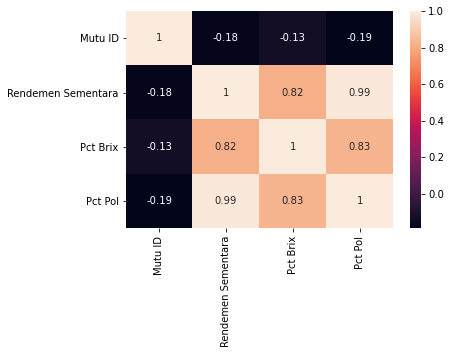

In [59]:
# Import library
import seaborn as sn
import matplotlib.pyplot as plt

#Uji Korelasi
corrMatrix = data1_MinMax.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

# PENGKLASTERAN (HIERARCHICAL K-MEANS CLUSTERING)

In [60]:
# Eliminasi kolom "Mutu ID"
x_scaled = data1_MinMax.drop(['Mutu ID'], axis = 1)

# Mengubah Data Frame menjadi array
x_array = np.array(x_scaled)
print(x_array)

[[0.15222482 0.22934076 0.18181818]
 [0.44964871 0.37325905 0.49818182]
 [0.45199063 0.37140204 0.5       ]
 ...
 [0.19437939 0.43454039 0.18181818]
 [0.19437939 0.39368617 0.18181818]
 [0.19437939 0.4549675  0.18181818]]


# Tahap ke-1: Agglomerative Hierarchical Clustering

In [26]:
# Import library
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [30]:
# Linkage Clustering 'single'
Z_single = linkage(x_array, method = 'single', metric = 'euclidean')
c_single, coph_dists1 = cophenet(Z_single, pdist(x_array,metric = 'euclidean'))
# Linkage Clustering 'complete'
Z_complete = linkage(x_array, method = 'complete', metric = 'euclidean')
c_complete, coph_dists2 = cophenet(Z_complete, pdist(x_array,metric = 'euclidean'))
# Linkage Clustering 'average'
Z_average = linkage(x_array, method = 'average', metric = 'euclidean')
c_average, coph_dists3 = cophenet(Z_average, pdist(x_array,metric = 'euclidean'))
# Linkage Clustering 'centroid'
Z_centroid = linkage(x_array, method = 'centroid', metric = 'euclidean')
c_centroid, coph_dists4 = cophenet(Z_centroid, pdist(x_array,metric = 'euclidean'))
# Linkage Clustering 'ward'
Z_ward = linkage(x_array, method = 'ward', metric = 'euclidean')
c_ward, coph_dists5 = cophenet(Z_ward, pdist(x_array,metric = 'euclidean'))

print(c_single,c_complete,c_average,c_centroid,c_ward)

0.381282151391144 0.6346266145771489 0.7925784816327603 0.7912977147928624 0.6284486064292818


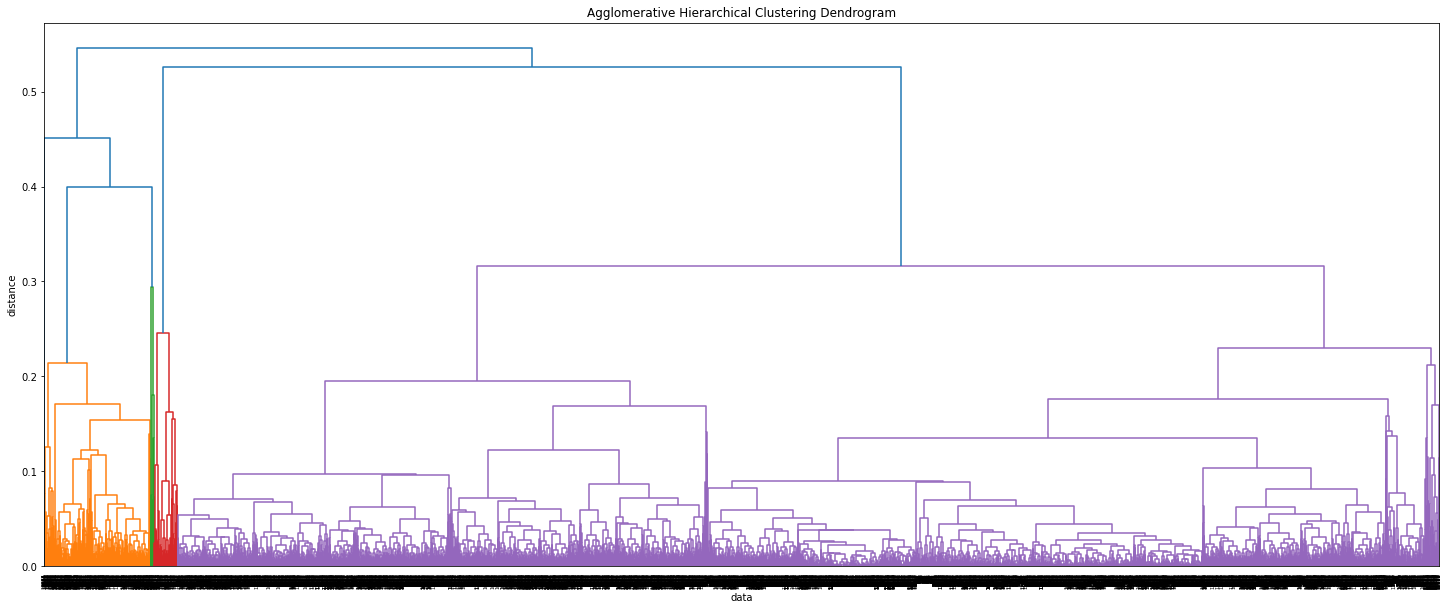

In [31]:
# Dendrogram Average Linkage (Full)

plt.figure(figsize=(25, 10))
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('data')
plt.ylabel('distance')
dendrogram(Z_average)
plt.show()

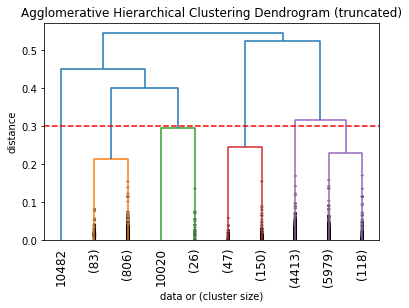

In [75]:
# Dendrogram Average Linkage (Full)
plt.title('Agglomerative Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('data or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z_average,
    truncate_mode='lastp',
    p=10,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True)
plt.axhline(y=0.3, color='r', linestyle='--')

# Hasil Inisial Centroid dari AHC untuk K-Means

In [61]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [62]:
# TAHAP AGGLOMERATIVE HIERARCHICAL CLUSTERING K=2 HINGGA K=6
# Agglomerative Hierarchical Clustering dengan k=2
cluster1 = AgglomerativeClustering(n_clusters=2,affinity='euclidean',
                                   linkage='average')
cluster1.fit_predict(x_scaled)
y1 = x_scaled.copy()
y1["kluster"] = cluster1.labels_
y1_data = y1.groupby('kluster').mean()
y1_df = pd.DataFrame(y1_data, columns=y1_data.columns)
y1_arr = np.array(y1_df)

# Agglomerative Hierarchical Clustering dengan k=3
cluster2 = AgglomerativeClustering(n_clusters=3,affinity='euclidean',
                                   linkage='average')
cluster2.fit_predict(x_scaled)
y2 = x_scaled.copy()
y2["kluster"] = cluster2.labels_
y2_data = y2.groupby('kluster').mean()
y2_df = pd.DataFrame(y2_data, columns=y2_data.columns)
y2_arr = np.array(y2_df)

# Agglomerative Hierarchical Clustering dengan k=4
cluster3 = AgglomerativeClustering(n_clusters=4,affinity='euclidean',
                                   linkage='average')
cluster3.fit_predict(x_scaled)
y3 = x_scaled.copy()
y3["kluster"] = cluster3.labels_
y3_data = y3.groupby('kluster').mean()
y3_df = pd.DataFrame(y3_data, columns=y3_data.columns)
y3_arr = np.array(y3_df)

# Agglomerative Hierarchical Clustering dengan k=5
cluster4 = AgglomerativeClustering(n_clusters=5,affinity='euclidean',
                                   linkage='average')
cluster4.fit_predict(x_scaled)
y4 = x_scaled.copy()
y4["kluster"] = cluster4.labels_
y4_data = y4.groupby('kluster').mean()
y4_df = pd.DataFrame(y4_data, columns=y4_data.columns)
y4_arr = np.array(y4_df)

# Agglomerative Hierarchical Clustering dengan k=6
cluster5 = AgglomerativeClustering(n_clusters=6,affinity='euclidean',
                                   linkage='average')
cluster5.fit_predict(x_scaled)
y5 = x_scaled.copy()
y5["kluster"] = cluster5.labels_
y5_data = y5.groupby('kluster').mean()
y5_df = pd.DataFrame(y5_data, columns=y5_data.columns)
y5_arr = np.array(y5_df)

#Print Array Centroid Inisial
print('Array Centroid Inisial k=2','\n',pd.DataFrame(y1_arr,columns=['Rendemen Sementara','Pct Brix','Pct Pol']))
print('Array Centroid Inisial k=3','\n',pd.DataFrame(y2_arr,columns=['Rendemen Sementara','Pct Brix','Pct Pol']))
print('Array Centroid Inisial k=4','\n',pd.DataFrame(y3_arr,columns=['Rendemen Sementara','Pct Brix','Pct Pol']))
print('Array Centroid Inisial k=5','\n',pd.DataFrame(y4_arr,columns=['Rendemen Sementara','Pct Brix','Pct Pol']))
print('Array Centroid Inisial k=6','\n',pd.DataFrame(y5_arr,columns=['Rendemen Sementara','Pct Brix','Pct Pol']))

Array Centroid Inisial k=2 
    Rendemen Sementara  Pct Brix  Pct Pol
0            0.358909  0.372548  0.35225
1            0.710159  0.568776  0.71259
Array Centroid Inisial k=3 
    Rendemen Sementara  Pct Brix   Pct Pol
0            0.710159  0.568776  0.712590
1            0.365163  0.374528  0.358784
2            0.025250  0.266886  0.003655
Array Centroid Inisial k=4 
    Rendemen Sementara  Pct Brix   Pct Pol
0            0.710218  0.568305  0.712650
1            0.365163  0.374528  0.358784
2            0.025250  0.266886  0.003655
3            0.655738  1.000000  0.658182
Array Centroid Inisial k=5 
    Rendemen Sementara  Pct Brix   Pct Pol
0            0.365163  0.374528  0.358784
1            0.971030  0.615736  0.974478
2            0.025250  0.266886  0.003655
3            0.655738  1.000000  0.658182
4            0.702297  0.566864  0.704698
Array Centroid Inisial k=6 
    Rendemen Sementara  Pct Brix   Pct Pol
0            0.971030  0.615736  0.974478
1            0.283

# Tahap ke-2 : K-Means Clusering k=2 hingga k=6

In [63]:
# Tahap K-Means Clustering dengan k=2
kmeans1 = KMeans(n_clusters=2, random_state=0, n_init=1, init=y1_arr, max_iter=1000)
hkmeans1 =kmeans1.fit(x_array)

# Tahap K-Means Clustering dengan k=3
kmeans2 = KMeans(n_clusters=3, random_state=0, n_init=1, init=y2_arr, max_iter=1000)
hkmeans2 =kmeans2.fit(x_array)


# Tahap K-Means Clustering dengan k=4
kmeans3 = KMeans(n_clusters=4, random_state=0, n_init=1, init=y3_arr, max_iter=1000)
hkmeans3 =kmeans3.fit(x_array)

# Tahap K-Means Clustering dengan k=5
kmeans4 = KMeans(n_clusters=5, random_state=0, n_init=1, init=y4_arr, max_iter=1000)
hkmeans4 =kmeans4.fit(x_array)

# Tahap K-Means Clustering dengan k=6
kmeans5 = KMeans(n_clusters=6, random_state=0, n_init=1, init=y5_arr, max_iter=1000)
hkmeans5 =kmeans5.fit(x_array)

# Print Centroid Hasil Hierarchical K-Means Clustering
print('Centroid Klaster k=2','\n',pd.DataFrame(kmeans1.cluster_centers_,columns=['Rendemen Sementara','Pct Brix','Pct Pol']))
print('Centroid Klaster k=3','\n',pd.DataFrame(kmeans2.cluster_centers_,columns=['Rendemen Sementara','Pct Brix','Pct Pol']))
print('Centroid Klaster k=4','\n',pd.DataFrame(kmeans3.cluster_centers_,columns=['Rendemen Sementara','Pct Brix','Pct Pol']))
print('Centroid Klaster k=5','\n',pd.DataFrame(kmeans4.cluster_centers_,columns=['Rendemen Sementara','Pct Brix','Pct Pol']))
print('Centroid Klaster k=6','\n',pd.DataFrame(kmeans5.cluster_centers_,columns=['Rendemen Sementara','Pct Brix','Pct Pol']))

Centroid Klaster k=2 
    Rendemen Sementara  Pct Brix   Pct Pol
0            0.295744  0.334693  0.287638
1            0.558446  0.488874  0.556598
Centroid Klaster k=3 
    Rendemen Sementara  Pct Brix   Pct Pol
0            0.561927  0.490752  0.560196
1            0.304989  0.337559  0.297262
2            0.030738  0.274556  0.009921
Centroid Klaster k=4 
    Rendemen Sementara  Pct Brix   Pct Pol
0            0.443494  0.435250  0.439101
1            0.280666  0.316249  0.272339
2            0.028264  0.274578  0.006925
3            0.647734  0.533180  0.647942
Centroid Klaster k=5 
    Rendemen Sementara  Pct Brix   Pct Pol
0            0.280511  0.316049  0.272173
1            0.647180  0.532658  0.647383
2            0.028264  0.274578  0.006925
3            0.655738  1.000000  0.658182
4            0.442893  0.435019  0.438492
Centroid Klaster k=6 
    Rendemen Sementara  Pct Brix   Pct Pol
0            0.693904  0.556738  0.695305
1            0.268860  0.300286  0.260073
2  

# Evaluasi Penentuan Jumlah Klaster k

In [64]:
# Hasil SSE dan Silhouette Index (SWC) 
# Untuk k=2
sse1 = hkmeans1.inertia_
kmeans1.fit_predict(x_array)
swc1 = silhouette_score(x_array, kmeans1.labels_, metric='euclidean')
# Untuk k=3
sse2 = hkmeans2.inertia_
kmeans2.fit_predict(x_array)
swc2 = silhouette_score(x_array, kmeans2.labels_, metric='euclidean')
# Untuk k=4
sse3 = hkmeans3.inertia_
kmeans3.fit_predict(x_array)
swc3 = silhouette_score(x_array, kmeans3.labels_, metric='euclidean')
# Untuk k=5
sse4 = hkmeans4.inertia_
kmeans4.fit_predict(x_array)
swc4 = silhouette_score(x_array, kmeans4.labels_, metric='euclidean')
# Untuk k=6
sse5 = hkmeans5.inertia_
kmeans5.fit_predict(x_array)
swc5 = silhouette_score(x_array, kmeans5.labels_, metric='euclidean')

#Print SSE dan SWC
print('Klaster k=2','\n','Sum of squared errors (SSE) =',sse1,'\n', 'Silhouette Width Criterion (SWC) =', swc1)
print('Klaster k=3','\n','Sum of squared errors (SSE) =',sse2,'\n', 'Silhouette Width Criterion (SWC) =', swc2)
print('Klaster k=4','\n','Sum of squared errors (SSE) =',sse3,'\n', 'Silhouette Width Criterion (SWC) =', swc3)
print('Klaster k=5','\n','Sum of squared errors (SSE) =',sse4,'\n', 'Silhouette Width Criterion (SWC) =', swc4)
print('Klaster k=6','\n','Sum of squared errors (SSE) =',sse5,'\n', 'Silhouette Width Criterion (SWC) =', swc5)

Klaster k=2 
 Sum of squared errors (SSE) = 225.43279321517727 
 Silhouette Width Criterion (SWC) = 0.5849764691653637
Klaster k=3 
 Sum of squared errors (SSE) = 193.02521062676337 
 Silhouette Width Criterion (SWC) = 0.5685456583460555
Klaster k=4 
 Sum of squared errors (SSE) = 107.78641370024174 
 Silhouette Width Criterion (SWC) = 0.5368084006860101
Klaster k=5 
 Sum of squared errors (SSE) = 107.55837868116502 
 Silhouette Width Criterion (SWC) = 0.5339017328140315
Klaster k=6 
 Sum of squared errors (SSE) = 74.4842489802054 
 Silhouette Width Criterion (SWC) = 0.49247571793448175


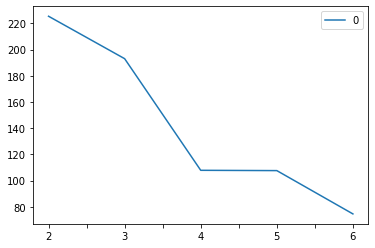

In [65]:
#Elbow Method

jumlah_klaster=["2","3","4","5","6"]
nilai_SSE=[sse1,sse2,sse3,sse4,sse5]
df1 = pd.DataFrame(nilai_SSE, index=jumlah_klaster)
df1.plot()

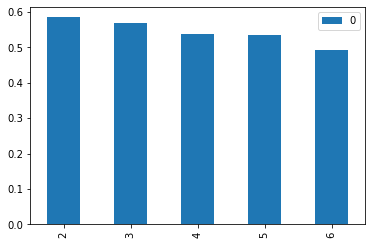

In [66]:
#Silhouette Index

jumlah_klaster=["2","3","4","5","6"]
nilai_SWC=[swc1,swc2,swc3,swc4,swc5]
df2 = pd.DataFrame(nilai_SWC, index=jumlah_klaster)
df2.plot.bar()

In [71]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


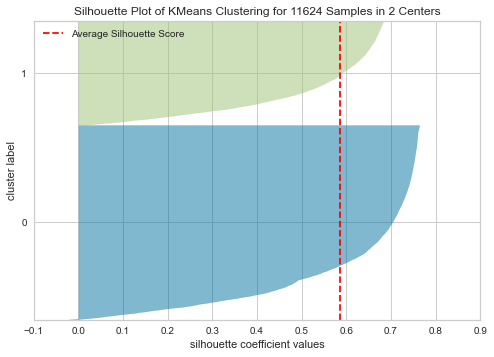

In [77]:
# #Silhouette Index k=2
from yellowbrick.cluster import SilhouetteVisualizer
visualizer1 = SilhouetteVisualizer(kmeans1, colors='yellowbrick')

visualizer1.fit(x_array) 
visualizer1.show()   

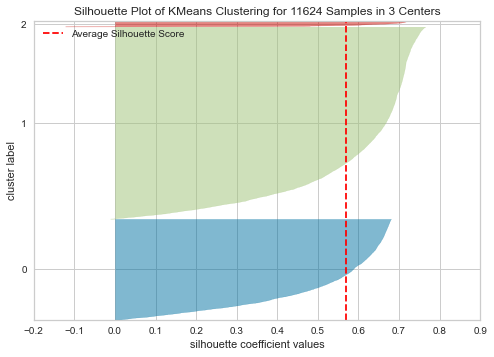

In [78]:
# #Silhouette Index k=3
from yellowbrick.cluster import SilhouetteVisualizer
visualizer2 = SilhouetteVisualizer(kmeans2, colors='yellowbrick')

visualizer2.fit(x_array) 
visualizer2.show()  

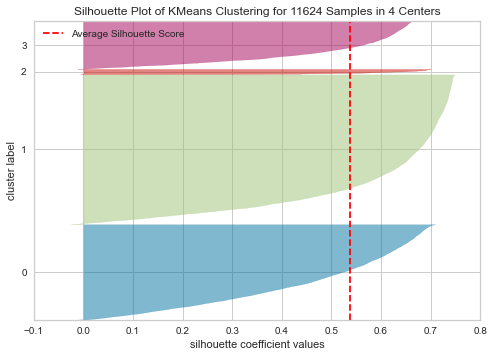

In [79]:
# #Silhouette Index k=4
from yellowbrick.cluster import SilhouetteVisualizer
visualizer3 = SilhouetteVisualizer(kmeans3, colors='yellowbrick')

visualizer3.fit(x_array) 
visualizer3.show()   

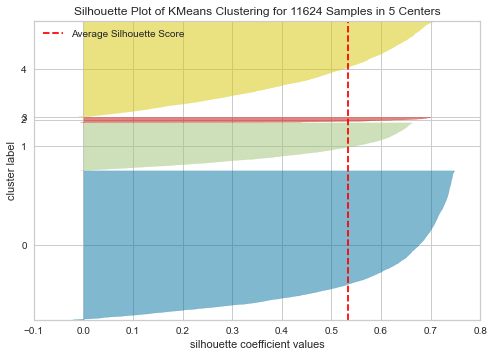

In [82]:
# #Silhouette Index k=5
from yellowbrick.cluster import SilhouetteVisualizer
visualizer4 = SilhouetteVisualizer(kmeans4, colors='yellowbrick')

visualizer4.fit(x_array) 
visualizer4.show()

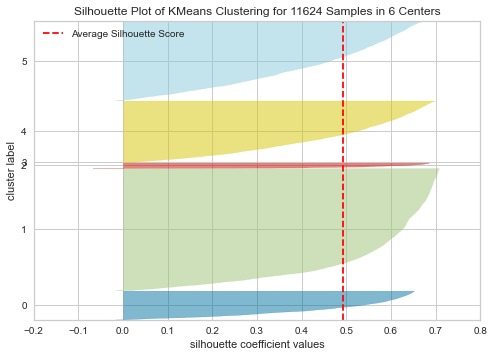

In [83]:
# #Silhouette Index k=6
from yellowbrick.cluster import SilhouetteVisualizer
visualizer5 = SilhouetteVisualizer(kmeans5, colors='yellowbrick')

visualizer5.fit(x_array) 
visualizer5.show()

# Jumlah klaster yang digunakan k=4

In [75]:
# Tahap K-Means Clustering dengan k=4
kmeans3 = KMeans(n_clusters=4, random_state=0, n_init=1, init=y3_arr, max_iter=1000)
hkmeans3 =kmeans3.fit(x_array)
pd.DataFrame(kmeans3.cluster_centers_,columns=['Rendemen Sementara','Pct Brix','Pct Pol'])


,Rendemen Sementara,Pct Brix,Pct Pol
0,0.443494,0.435250,0.439101
1,0.280666,0.316249,0.272339
2,0.028264,0.274578,0.006925
3,0.647734,0.533180,0.647942


In [76]:
data_klaster = x_scaled
data_klaster["Kluster"]=kmeans3.labels_
data_klaster.head()


,Rendemen Sementara,Pct Brix,Pct Pol,Kluster
0,0.152225,0.229341,0.181818,1
1,0.449649,0.373259,0.498182,0
2,0.451991,0.371402,0.500000,0
3,0.203747,0.334262,0.236364,1
4,0.290398,0.291551,0.329091,1


In [137]:
# Export hasil cluster menjadi Excel

data_klaster.to_excel("Hasil Kluster PT.XYZ k=4.xlsx", index = False)

In [138]:
data_klaster_asli = input_data.drop(['Purch.Doc.','Mutu ID'], axis = 1)
data_klaster_asli["Kluster"]=kmeans3.labels_
data_klaster_asli.head()

,Rendemen Sementara,Pct Brix,Pct Pol,Kluster
0,6.57,12.47,9.00,1
1,7.84,14.02,10.74,0
2,7.85,14.00,10.75,0
3,6.79,13.60,9.30,1
4,7.16,13.14,9.81,1


In [139]:
# Export hasil cluster dari data asli menjadi Excel

data_klaster_asli.to_excel("[Data Awal] Hasil Kluster PT.XYZ k=4.xlsx", index = False)

# Karakteristik Klaster k=4

In [146]:
#KARAKTERISTIK SETIAP KLASTER

klaster_count=data_klaster_asli.groupby('Kluster').count()
klaster_mean=data_klaster_asli.groupby('Kluster').mean()
klaster_min=data_klaster_asli.groupby('Kluster').min()
klaster_max=data_klaster_asli.groupby('Kluster').max()
print('Count','\n',klaster_count)
print('Rata-rata','\n',klaster_mean)
print('Nilai Min','\n',klaster_min)
print('Nilai Max','\n',klaster_max)

Count 
          Rendemen Sementara  Pct Brix  Pct Pol
Kluster                                       
0                      3720      3720     3720
1                      5842      5842     5842
2                       204       204      204
3                      1858      1858     1858
Rata-rata 
          Rendemen Sementara   Pct Brix    Pct Pol
Kluster                                          
0                  7.810876  14.684685  10.411323
1                  7.117604  13.403494   9.496727
2                  6.040686  12.957206   8.038088
3                  8.683477  15.739435  11.560640
Nilai Min 
          Rendemen Sementara  Pct Brix  Pct Pol
Kluster                                       
0                      7.21     11.85     9.61
1                      6.52     10.00     8.71
2                      5.92     10.00     8.00
3                      8.15     13.51    10.85
Nilai Max 
          Rendemen Sementara  Pct Brix  Pct Pol
Kluster                                      

# BAB 5 PREDIKSI UNTUK KLASIFIKASI

In [2]:
#import library

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
# Input Data Klaster
input_data2 = pd.read_excel("Data Klaster PT.XYZ.xlsx")
input_data2.head()

,Rendemen Sementara,Pct Brix,Pct Pol,Mutu Gula BBT
0,0.152225,0.229341,0.181818,2
1,0.449649,0.373259,0.498182,1
2,0.451991,0.371402,0.500000,1
3,0.203747,0.334262,0.236364,2
4,0.290398,0.291551,0.329091,2


In [4]:
# Info Data
input_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11624 entries, 0 to 11623
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rendemen Sementara  11624 non-null  float64
 1   Pct Brix            11624 non-null  float64
 2   Pct Pol             11624 non-null  float64
 3   Mutu Gula BBT       11624 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 363.4 KB


# Uji Korelasi Mutu Gula

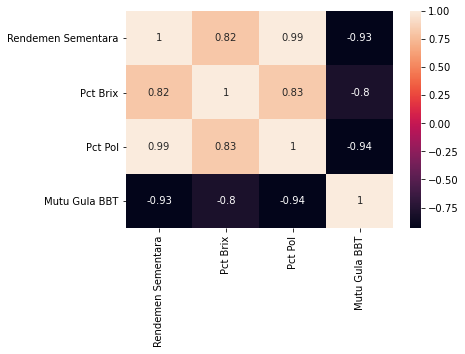

In [6]:
# Import library
import seaborn as sn
import matplotlib.pyplot as plt

#Uji Korelasi
corrMatrix2 = input_data2.corr()
sn.heatmap(corrMatrix2, annot=True)
plt.show()

# Pemisahan Data Training dan Testing

In [5]:
#Pemisahan Data Menurut Variabel x dan y
# variabel y = "Mutu Gula BBT"
# variabel x = "Rendemen Sementara", "Pct Brix", "Pct Pol"
x_df= input_data2.drop(['Mutu Gula BBT'], axis = 1)
x_dtr= np.array(x_df)
y_df = input_data2['Mutu Gula BBT']
y_dtr = np.array(y_df)

In [50]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split Data Klaster menjadi 70% training and 30% testting
x_train, x_test, y_train, y_test = train_test_split(x_dtr, y_dtr, test_size=0.3)
print('Jumlah Data Training =',len(x_train))
print('Jumlah Data Testing =',len(x_test))

Jumlah Data Training = 8136
Jumlah Data Testing = 3488


# K-Nearest Neighbors (KNN)

In [6]:
#Import Library KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

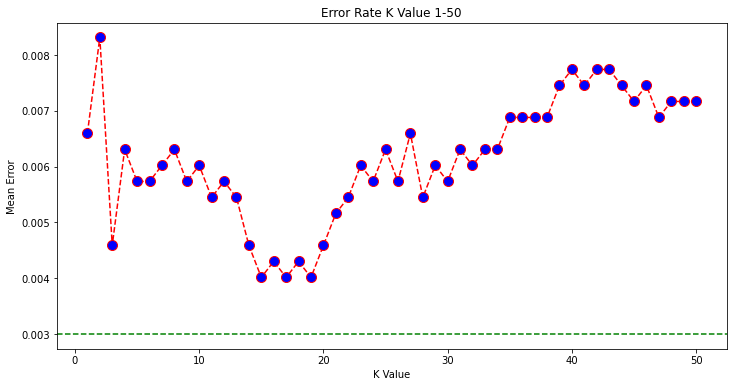

In [47]:
error = []
# Perhitungan error untuk nilai K antara 1 dan 50
for k in range(1, 51):
    knn_k = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_k.fit(x_train, y_train)
    pred_k = knn_k.predict(x_test)
    error.append(np.mean(pred_k != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 51), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value 1-50')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.axhline(y=0.003, color='g', linestyle='--')

In [51]:
#Membentuk KNN Classifier dengan nilai K tetangga terdekat=20
knn = KNeighborsClassifier(n_neighbors=20, metric='euclidean')

#Latih model KNN Classifier menggunakan data training
knn.fit(x_train, y_train)

#Lakukan prediksi menggunakan variabel x data testing
y_pred1 = knn.predict(x_test)

#Confusion Matrix KNN dengan K = 20 (antara hasil prediksi y dan y testing)
print('Report Confusion Matrix KKN =','\n')
print(metrics.confusion_matrix(y_test, y_pred1),'\n')
print(metrics.classification_report(y_test, y_pred1,target_names=['A','B','C','D'], 
                                    digits=5))

Report Confusion Matrix KKN = 

[[ 554    1    0    0]
 [   6 1111    8    0]
 [   0    7 1741    0]
 [   0    0    2   58]] 

              precision    recall  f1-score   support

           A    0.98929   0.99820   0.99372       555
           B    0.99285   0.98756   0.99020      1125
           C    0.99429   0.99600   0.99514      1748
           D    1.00000   0.96667   0.98305        60

    accuracy                        0.99312      3488
   macro avg    0.99411   0.98710   0.99053      3488
weighted avg    0.99313   0.99312   0.99311      3488



# Support Vector Machine (SVM)

# Kernel RBF

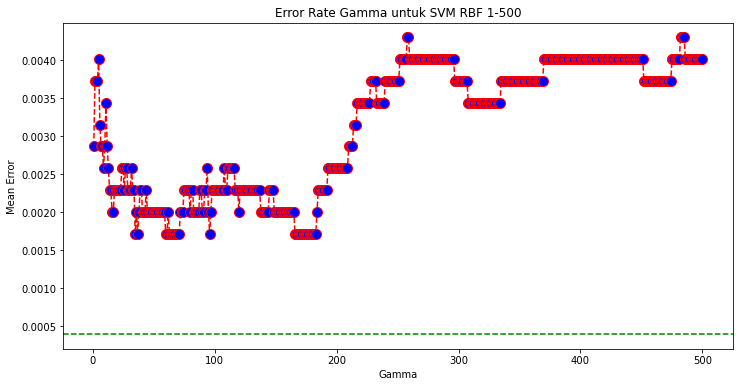

In [20]:
#Import Library SVM
from sklearn import svm

# KERNEL RBF
error1 = []
# Perhitungan error untuk nilai gamma 1-500
for g in range(1, 501):
    clf1_g = svm.SVC(kernel='rbf', gamma=g)
    clf1_g.fit(x_train, y_train)
    pred1_g = clf1_g.predict(x_test)
    error1.append(np.mean(pred1_g != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 501), error1, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate Gamma untuk SVM RBF 1-500')
plt.xlabel('Gamma')
plt.ylabel('Mean Error')
plt.axhline(y=0.0004, color='g', linestyle='--')

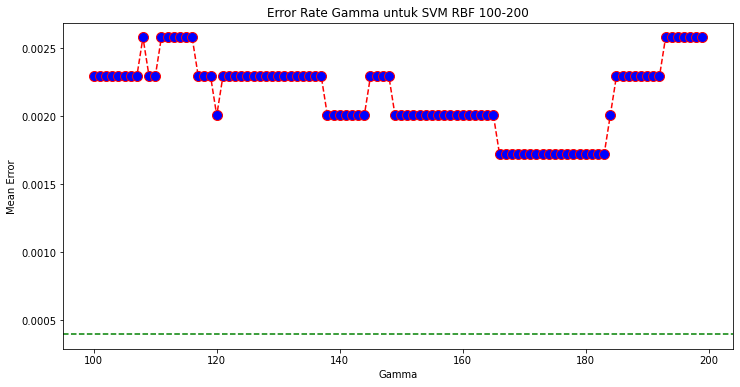

In [21]:
# KERNEL RBF
error2 = []
# Perhitungan error untuk nilai gamma 100-200
for g in range(100, 200):
    clf2_g = svm.SVC(kernel='rbf', gamma=g)
    clf2_g.fit(x_train, y_train)
    pred2_g = clf2_g.predict(x_test)
    error2.append(np.mean(pred2_g != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(100, 200), error2, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate Gamma untuk SVM RBF 100-200')
plt.xlabel('Gamma')
plt.ylabel('Mean Error')
plt.axhline(y=0.0004, color='g', linestyle='--')

In [54]:
#Import Library SVM
from sklearn import svm

#Membentuk SVM Classifier dengan Kernel RBF
clf_rbf = svm.SVC(kernel='rbf', gamma=155)

#Latih model SVM Classifier menggunakan data training
clf_rbf.fit(x_train, y_train)

#Lakukan prediksi menggunakan variabel x data testing
y_pred2 = clf_rbf.predict(x_test)

#Confusion Matrix SVM RBF (antara hasil prediksi y dan y testing)
print('Report Confusion Matrix SVM RBF =','\n')
print(metrics.confusion_matrix(y_test, y_pred2),'\n')
print(metrics.classification_report(y_test, y_pred2,target_names=['A','B','C','D'], 
                                    digits=5))

Report Confusion Matrix SVM RBF = 

[[ 555    0    0    0]
 [   3 1112   10    0]
 [   0    7 1741    0]
 [   0    0    0   60]] 

              precision    recall  f1-score   support

           A    0.99462   1.00000   0.99730       555
           B    0.99374   0.98844   0.99109      1125
           C    0.99429   0.99600   0.99514      1748
           D    1.00000   1.00000   1.00000        60

    accuracy                        0.99427      3488
   macro avg    0.99566   0.99611   0.99588      3488
weighted avg    0.99426   0.99427   0.99426      3488



# Polinomial

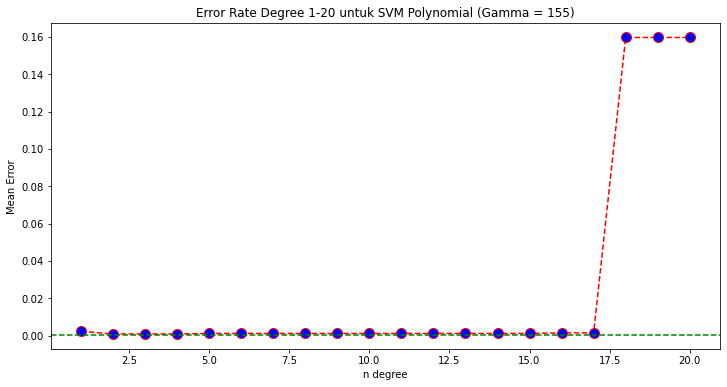

In [23]:
#KERNEL POLYNOMIAL dengan Hasil Gamma RBF = 155
error3 = []
# Perhitungan error untuk nilai degree polynomial antara 1 dan 20
for d in range(1, 21):
    clf1_d = svm.SVC(kernel='poly', degree=d, gamma = 155)
    clf1_d.fit(x_train, y_train)
    pred_d = clf1_d.predict(x_test)
    error3.append(np.mean(pred_d != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), error3, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate Degree 1-20 untuk SVM Polynomial (Gamma = 155)')
plt.xlabel('n degree')
plt.ylabel('Mean Error')
plt.axhline(y=0.0004, color='g', linestyle='--')

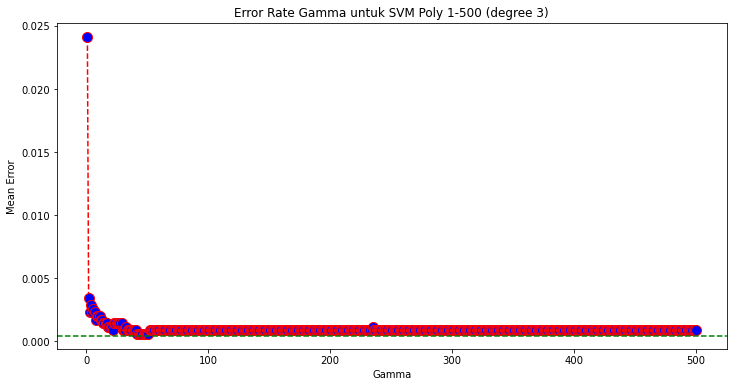

In [24]:
#KERNEL POLYNOMIAL dengan degree/derajat d = 3
error4 = []
# Perhitungan error untuk nilai gamma 1-500
for g in range(1, 501):
    clf3_g = svm.SVC(kernel='poly', degree=3, gamma=g)
    clf3_g.fit(x_train, y_train)
    pred3_g = clf3_g.predict(x_test)
    error4.append(np.mean(pred3_g != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 501), error4, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate Gamma untuk SVM Poly 1-500 (degree 3)')
plt.xlabel('Gamma')
plt.ylabel('Mean Error')
plt.axhline(y=0.0004, color='g', linestyle='--')

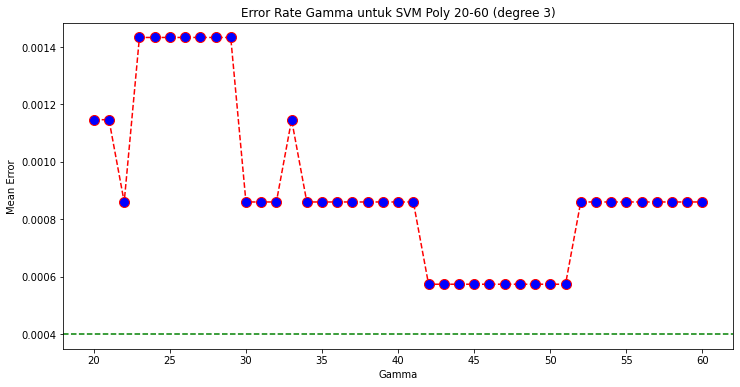

In [25]:
#KERNEL POLYNOMIAL dengan degree/derajat d = 3
error5 = []
# Perhitungan error untuk nilai gamma 20-60
for g in range(20, 61):
    clf4_g = svm.SVC(kernel='poly', degree=3, gamma=g)
    clf4_g.fit(x_train, y_train)
    pred4_g = clf4_g.predict(x_test)
    error5.append(np.mean(pred4_g != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(20, 61), error5, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate Gamma untuk SVM Poly 20-60 (degree 3)')
plt.xlabel('Gamma')
plt.ylabel('Mean Error')
plt.axhline(y=0.0004, color='g', linestyle='--')

In [84]:
#Membentuk SVM Classifier dengan Kernel POLIYNOMIAL dengan degree = 3 dan gamma = 44
clf_poly = svm.SVC(kernel='poly', degree=3, gamma=44) # Polinomial Kernel

#Latih model SVM Classifier menggunakan data training
clf_poly.fit(x_train, y_train)

#Lakukan prediksi menggunakan variabel x data testing
y_pred3 = clf_poly.predict(x_test)

#Confusion Matrix SVM Poly (antara hasil prediksi y dan y testing)
print('Report Confusion Matrix SVM Polynomial =','\n')
print(metrics.confusion_matrix(y_test, y_pred3),'\n')
print(metrics.classification_report(y_test, y_pred3,target_names=['A','B','C','D'], 
                                    digits=5))

Report Confusion Matrix SVM Polynomial = 

[[ 555    0    0    0]
 [   0 1122    3    0]
 [   0    2 1746    0]
 [   0    0    0   60]] 

              precision    recall  f1-score   support

           A    1.00000   1.00000   1.00000       555
           B    0.99822   0.99733   0.99778      1125
           C    0.99828   0.99886   0.99857      1748
           D    1.00000   1.00000   1.00000        60

    accuracy                        0.99857      3488
   macro avg    0.99913   0.99905   0.99909      3488
weighted avg    0.99857   0.99857   0.99857      3488



# SENSITIVITAS DATA SET KNN DAN SVM

In [680]:
#sample random
df = input_data2.sample(frac=0.9)

#Pemisahan Data Menurut Variabel x dan y
# variabel y = "Mutu Gula BBT"
# variabel x = "Rendemen Sementara", "Pct Brix", "Pct Pol"
x_df= df.drop(['Mutu Gula BBT'], axis = 1)
x_dtr= np.array(x_df)
y_df = df['Mutu Gula BBT']
y_dtr = np.array(y_df)

In [689]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split Data Klaster menjadi 70% training and 30% testting
x_train, x_test, y_train, y_test = train_test_split(x_dtr, y_dtr, test_size=0.3)
print('Jumlah Data Training =',len(x_train))
print('Jumlah Data Testing =',len(x_test))

Jumlah Data Training = 7323
Jumlah Data Testing = 3139


In [690]:
#Membentuk KNN Classifier dengan nilai K tetangga terdekat=20
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')

#Latih model KNN Classifier menggunakan data training
knn.fit(x_train, y_train)

#Lakukan prediksi menggunakan variabel x data testing
y_pred1 = knn.predict(x_test)

#Confusion Matrix KNN dengan K = 20 (antara hasil prediksi y dan y testing)
print('Report Confusion Matrix KKN =','\n')
print(metrics.confusion_matrix(y_test, y_pred1),'\n')
print(metrics.classification_report(y_test, y_pred1,target_names=['A','B','C','D'], 
                                    digits=5))

Report Confusion Matrix KKN = 

[[ 489    2    0    0]
 [   5  976    5    0]
 [   0    5 1607    0]
 [   0    0    1   49]] 

              precision    recall  f1-score   support

           A    0.98988   0.99593   0.99289       491
           B    0.99288   0.98986   0.99137       986
           C    0.99628   0.99690   0.99659      1612
           D    1.00000   0.98000   0.98990        50

    accuracy                        0.99427      3139
   macro avg    0.99476   0.99067   0.99269      3139
weighted avg    0.99427   0.99427   0.99426      3139



In [691]:
#Import Library SVM
from sklearn import svm

#Membentuk SVM Classifier dengan Kernel RBF
clf_rbf = svm.SVC(kernel='rbf',gamma=155)

#Latih model SVM Classifier menggunakan data training
clf_rbf.fit(x_train, y_train)

#Lakukan prediksi menggunakan variabel x data testing
y_pred2 = clf_rbf.predict(x_test)

#Confusion Matrix SVM RBF (antara hasil prediksi y dan y testing)
print('Report Confusion Matrix SVM RBF =','\n')
print(metrics.confusion_matrix(y_test, y_pred2),'\n')
print(metrics.classification_report(y_test, y_pred2,target_names=['A','B','C','D'], 
                                    digits=5))

Report Confusion Matrix SVM RBF = 

[[ 491    0    0    0]
 [   1  977    8    0]
 [   0    1 1611    0]
 [   0    0    0   50]] 

              precision    recall  f1-score   support

           A    0.99797   1.00000   0.99898       491
           B    0.99898   0.99087   0.99491       986
           C    0.99506   0.99938   0.99721      1612
           D    1.00000   1.00000   1.00000        50

    accuracy                        0.99681      3139
   macro avg    0.99800   0.99756   0.99778      3139
weighted avg    0.99682   0.99681   0.99681      3139



In [692]:
#Membentuk SVM Classifier dengan Kernel POLIYNOMIAL dengan degree = 3 dan gamma = 44
clf_poly = svm.SVC(kernel='poly', degree=3, gamma=44) # Polinomial Kernel

#Latih model SVM Classifier menggunakan data training
clf_poly.fit(x_train, y_train)

#Lakukan prediksi menggunakan variabel x data testing
y_pred3 = clf_poly.predict(x_test)

#Confusion Matrix SVM Poly (antara hasil prediksi y dan y testing)
print('Report Confusion Matrix SVM Polynomial =','\n')
print(metrics.confusion_matrix(y_test, y_pred3),'\n')
print(metrics.classification_report(y_test, y_pred3,target_names=['A','B','C','D'], 
                                    digits=5))

Report Confusion Matrix SVM Polynomial = 

[[ 491    0    0    0]
 [   0  985    1    0]
 [   0    0 1612    0]
 [   0    0    1   49]] 

              precision    recall  f1-score   support

           A    1.00000   1.00000   1.00000       491
           B    1.00000   0.99899   0.99949       986
           C    0.99876   1.00000   0.99938      1612
           D    1.00000   0.98000   0.98990        50

    accuracy                        0.99936      3139
   macro avg    0.99969   0.99475   0.99719      3139
weighted avg    0.99936   0.99936   0.99936      3139

